# Alireza Amiri - Project 3
## Task 1


In [3]:
# Import necessary libraries
import numpy as np
import gym
from gym.envs.registration import register
import matplotlib.pyplot as plt
import pandas as pd

# 1. Environment Registration


## 1.1 Custom Frozen Lake Environment

Register two versions of the Frozen Lake environment: one that is slippery and one that is not. This allows us to compare the performance of the RL algorithms under different conditions.

In [4]:
# Register custom Frozen Lake environment (non-slippery)
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'desc': [
        "SFFFFFFH",
        "FFHHHHFH",
        "FFHHFFFF",
        "FFFHFHHG",
        "FFHHFHHF",
        "FFHFFHFF",
        "FHFFFFFF",
        "FFFFFFFF",
    ], 'is_slippery': False}
)

# Register custom Frozen Lake environment (slippery)
register(
    id='FrozenLakeSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'desc': [
        "SFFFFFFH",
        "FFHHHHFH",
        "FFHHFFFF",
        "FFFHFHHG",
        "FFHHFHHF",
        "FFHFFHFF",
        "FHFFFFFF",
        "FFFFFFFF",
    ], 'is_slippery': True}
)

# Create environments
env_not_slippery = gym.make('FrozenLakeNotSlippery-v0', new_step_api=True)
env_slippery = gym.make('FrozenLakeSlippery-v0', new_step_api=True)


# 2. Q-Learning and SARSA Algorithms

## 2.1 Algorithm Parameters

Define the parameters for the Q-Learning and SARSA algorithms.

In [9]:
# Algorithm parameters
alpha = 0.8
epsilon = 1.0
epsilon_decay = 0.99999999999
min_epsilon = 0.01
episodes = 100000
max_steps = 100
gamma_values = [0.5,0.7,0.99]


## 2.2 Q-Learning Implementation

Q-Learning is a value-based method of reinforcement learning. It updates the Q-value of the current state-action pair using the Bellman equation.

In [10]:
def q_learning(env, gamma):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []
    epsilons = []
    epsilon = 1.0

    def choose_action(state, epsilon, visited_states):
        if np.random.rand() < epsilon or state in visited_states:
            return env.action_space.sample()
        else:
            return np.argmax(Q[state, :])

    for episode in range(episodes):
        if episode % 1000 == 0:
            print(f"Q-Learning: Episode {episode}")
        state = env.reset()
        state = state[0] if isinstance(state, tuple) else state
        total_reward = 0
        visited_states = set()

        for step in range(max_steps):
            visited_states.add(state)
            action = choose_action(state, epsilon, visited_states)
            next_state, reward, done, truncated, info = env.step(action)

            Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])

            state = next_state
            total_reward += reward

            if done:
                break

        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        rewards.append(total_reward)
        epsilons.append(epsilon)

    return Q, rewards, epsilons


## 2.3 SARSA Implementation

SARSA (State-Action-Reward-State-Action) is an on-policy method. It updates the Q-value using the action taken in the next state.

In [11]:
def sarsa(env, gamma):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []
    epsilons = []
    epsilon = 1.0

    def choose_action(state, epsilon):
        if np.random.rand() < epsilon:
            return env.action_space.sample()
        else:
            return np.argmax(Q[state, :])

    for episode in range(episodes):
        if episode % 1000 == 0:
            print(f"SARSA: Episode {episode}")
        state = env.reset()
        state = state[0] if isinstance(state, tuple) else state
        total_reward = 0

        action = choose_action(state, epsilon)

        for step in range(max_steps):
            next_state, reward, done, truncated, info = env.step(action)
            next_state = next_state if isinstance(next_state, int) else next_state[0]
            next_action = choose_action(next_state, epsilon)

            Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])

            state = next_state
            action = next_action
            total_reward += reward

            if done:
                break

        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        rewards.append(total_reward)
        epsilons.append(epsilon)

    return Q, rewards, epsilons


# 3. Display and Analysis

## 3.1 Display Optimal Policy

A function to display the optimal policy derived from the Q-values.

In [12]:
def display_policy(Q):
    actions = ["←", "↓", "→", "↑"]
    optimal_policy = np.argmax(Q, axis=1).reshape(8, 8)
    policy_display = np.vectorize(lambda x: actions[x])(optimal_policy)
    for row in policy_display:
        print(" ".join(row))


## 3.2 Train and Compare Algorithms

Train both Q-Learning and SARSA algorithms with different gamma values and compare their performance.

In [13]:
# Train Q-Learning and SARSA with different gamma values
results_q_learning_not_slippery = []
results_q_learning_slippery = []
results_sarsa_not_slippery = []
results_sarsa_slippery = []

for gamma in gamma_values:
    print(f"Training Q-Learning (slippery=False) with gamma={gamma}")
    Q, rewards, epsilons = q_learning(env_not_slippery, gamma)
    results_q_learning_not_slippery.append({'gamma': gamma, 'Q': Q, 'rewards': rewards, 'epsilons': epsilons})

    print(f"Training Q-Learning (slippery=True) with gamma={gamma}")
    Q, rewards, epsilons = q_learning(env_slippery, gamma)
    results_q_learning_slippery.append({'gamma': gamma, 'Q': Q, 'rewards': rewards, 'epsilons': epsilons})

    print(f"Training SARSA (slippery=False) with gamma={gamma}")
    Q, rewards, epsilons = sarsa(env_not_slippery, gamma)
    results_sarsa_not_slippery.append({'gamma': gamma, 'Q': Q, 'rewards': rewards, 'epsilons': epsilons})

    print(f"Training SARSA (slippery=True) with gamma={gamma}")
    Q, rewards, epsilons = sarsa(env_slippery, gamma)
    results_sarsa_slippery.append({'gamma': gamma, 'Q': Q, 'rewards': rewards, 'epsilons': epsilons})


Training Q-Learning (slippery=False) with gamma=0.5
Q-Learning: Episode 0


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Q-Learning: Episode 1000
Q-Learning: Episode 2000
Q-Learning: Episode 3000
Q-Learning: Episode 4000
Q-Learning: Episode 5000
Q-Learning: Episode 6000
Q-Learning: Episode 7000
Q-Learning: Episode 8000
Q-Learning: Episode 9000
Q-Learning: Episode 10000
Q-Learning: Episode 11000
Q-Learning: Episode 12000
Q-Learning: Episode 13000
Q-Learning: Episode 14000
Q-Learning: Episode 15000
Q-Learning: Episode 16000
Q-Learning: Episode 17000
Q-Learning: Episode 18000
Q-Learning: Episode 19000
Q-Learning: Episode 20000
Q-Learning: Episode 21000
Q-Learning: Episode 22000
Q-Learning: Episode 23000
Q-Learning: Episode 24000
Q-Learning: Episode 25000
Q-Learning: Episode 26000
Q-Learning: Episode 27000
Q-Learning: Episode 28000
Q-Learning: Episode 29000
Q-Learning: Episode 30000
Q-Learning: Episode 31000
Q-Learning: Episode 32000
Q-Learning: Episode 33000
Q-Learning: Episode 34000
Q-Learning: Episode 35000
Q-Learning: Episode 36000
Q-Learning: Episode 37000
Q-Learning: Episode 38000
Q-Learning: Episode 3

## 3.3 Plot Results

Plot the accumulated rewards for each algorithm.

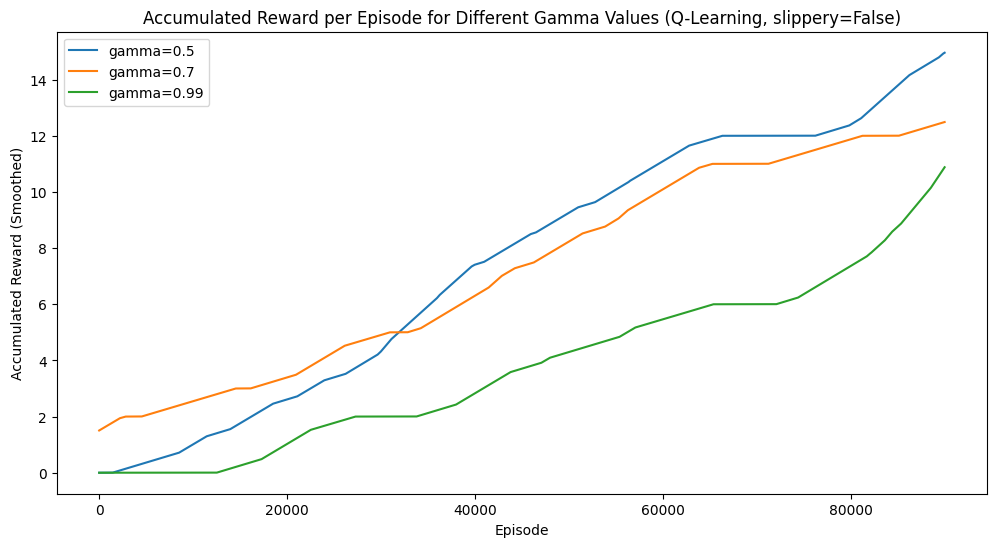

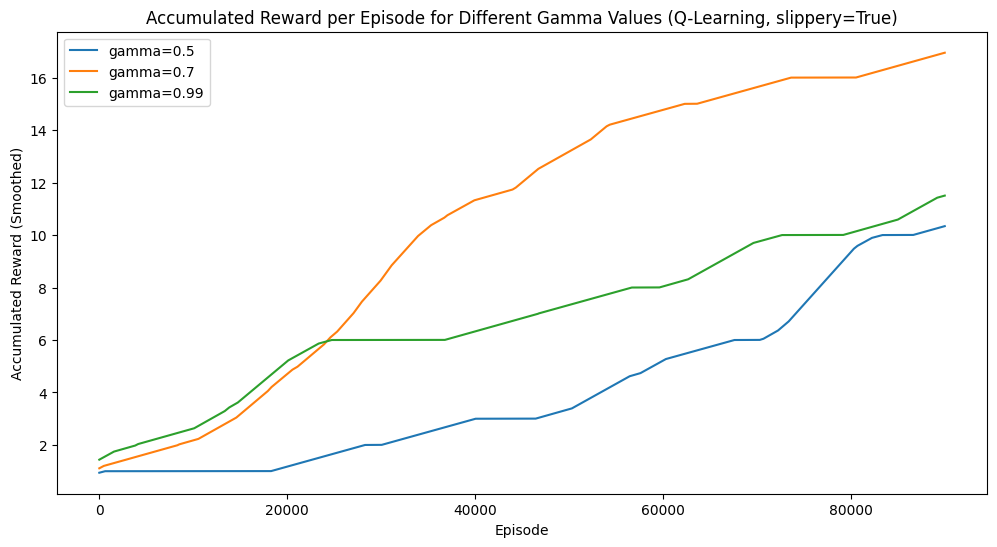

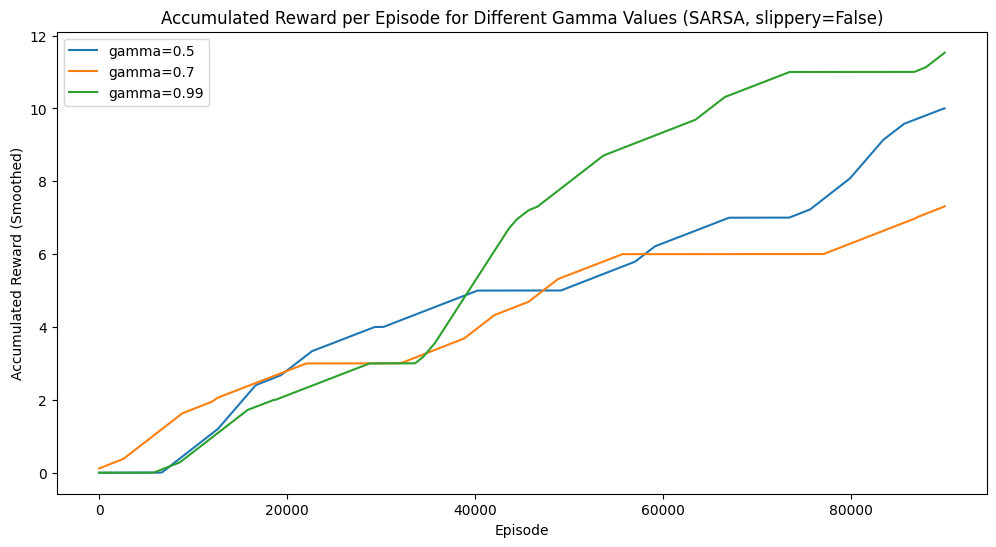

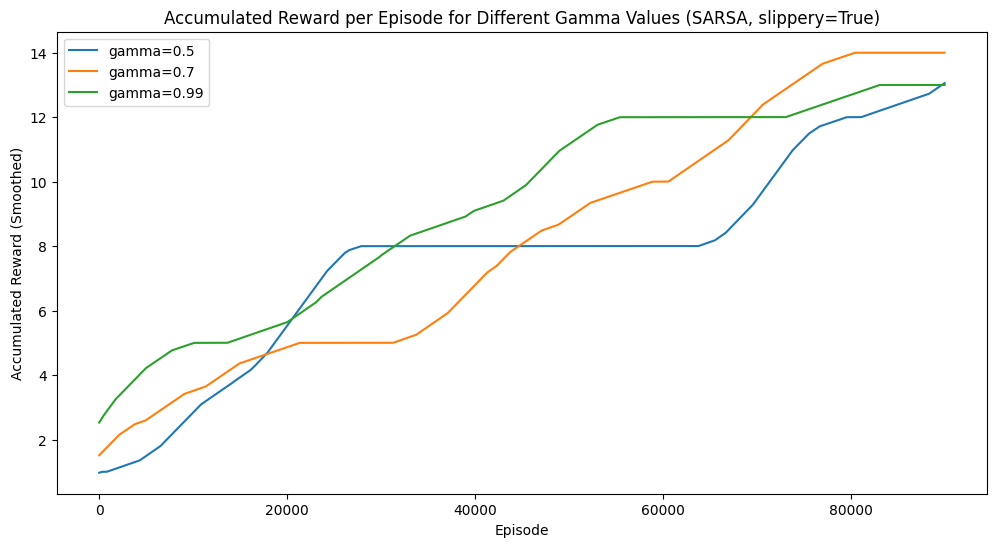

In [15]:
def plot_rewards_smooth(results, title, filename, window_size=100):
    plt.figure(figsize=(12, 6))
    for result in results:
        accumulated_rewards = np.cumsum(result['rewards'])
        smoothed_rewards = moving_average(accumulated_rewards, window_size)
        plt.plot(smoothed_rewards, label=f'gamma={result["gamma"]}')
    plt.xlabel('Episode')
    plt.ylabel('Accumulated Reward (Smoothed)')
    plt.title(title)
    plt.legend()
    plt.savefig(filename)
    plt.show()

# Call the function with the desired window size
plot_rewards_smooth(results_q_learning_not_slippery, 'Accumulated Reward per Episode for Different Gamma Values (Q-Learning, slippery=False)', 'q_learning_not_slippery.png', window_size=10000)
plot_rewards_smooth(results_q_learning_slippery, 'Accumulated Reward per Episode for Different Gamma Values (Q-Learning, slippery=True)', 'q_learning_slippery.png', window_size=10000)
plot_rewards_smooth(results_sarsa_not_slippery, 'Accumulated Reward per Episode for Different Gamma Values (SARSA, slippery=False)', 'sarsa_not_slippery.png', window_size=10000)
plot_rewards_smooth(results_sarsa_slippery, 'Accumulated Reward per Episode for Different Gamma Values (SARSA, slippery=True)', 'sarsa_slippery.png', window_size=10000)


## 3.4 Display Optimal Policies

Display the optimal policies for both Q-Learning and SARSA in slippery and non-slippery environments.

In [16]:
# Display optimal policies
print("Optimal Policy for Q-Learning (slippery=False):")
for result in results_q_learning_not_slippery:
    print(f"gamma={result['gamma']}")
    display_policy(result['Q'])

print("Optimal Policy for Q-Learning (slippery=True):")
for result in results_q_learning_slippery:
    print(f"gamma={result['gamma']}")
    display_policy(result['Q'])

print("Optimal Policy for SARSA (slippery=False):")
for result in results_sarsa_not_slippery:
    print(f"gamma={result['gamma']}")
    display_policy(result['Q'])

print("Optimal Policy for SARSA (slippery=True):")
for result in results_sarsa_slippery:
    print(f"gamma={result['gamma']}")
    display_policy(result['Q'])


Optimal Policy for Q-Learning (slippery=False):
gamma=0.5
→ → → → → → ↓ ←
→ ↑ ← ← ← ← ↓ ←
→ ↑ ← ← → → → ↓
→ ↑ ← ← ↑ ← ← ←
↑ ↑ ← ← ↓ ← ← ↑
↓ ↑ ← ↓ ↓ ← ↓ ↑
↓ ← → → → → → ↑
→ → → → → ↑ ↑ ↑
gamma=0.7
→ → → → → → ↓ ←
↑ ↑ ← ← ← ← ↓ ←
↑ ↑ ← ← ← → → ↓
↑ ↑ ← ← ↓ ← ← ←
↑ ↑ ← ← ↓ ← ← ↑
↓ ↑ ← ↓ ↓ ← → ↑
↓ ← → → → → → ↑
→ → → → → → → ↑
gamma=0.99
→ → → → → → ↓ ←
→ ↑ ← ← ← ← ↓ ←
↑ ↑ ← ← ← → → ↓
↑ ↑ ← ← ← ← ← ←
↑ ↑ ← ← ↓ ← ← ↑
↓ ↑ ← ↓ ↓ ← → ↑
↓ ← → → → → → ↑
→ → → → ↑ → → ↑
Optimal Policy for Q-Learning (slippery=True):
gamma=0.5
↑ ↓ ↑ ↑ ↓ → → ←
→ ← ← ← ← ← → ←
→ ↑ ← ← ← ↓ ↑ ↓
↑ ↑ ← ← ↓ ← ← ←
← ← ← ← → ← ← ↑
← ← ← ↑ ← ← ↓ ←
→ ← ← ↑ → ↑ ↑ ↑
↓ → → → → → → →
gamma=0.7
↑ → ↑ ↓ ↑ ← → ←
← ↑ ← ← ← ← ↑ ←
← → ← ← ↓ → → ←
← ↑ ← ← ← ← ← ←
→ → ← ← → ← ← →
↑ ↑ ← ↓ ← ← ↑ ↑
← ← → → ↑ → → ←
↑ ↑ ↑ → → ← ← ←
gamma=0.99
↑ → ↓ → ↑ ↑ ← ←
→ ← ← ← ← ← → ←
↑ ↑ ← ← ↓ → → ↓
← ← ← ← ← ← ← ←
← ← ← ← ↓ ← ← →
← ← ← → ← ← → →
← ← → ↑ → ↓ ↑ →
↓ ↓ ↓ ↑ → → ↑ →
Optimal Policy for SARSA (slippery=False):
gamma=0.5
↑ ← → → → ↑ ↓ ←
↑ ↑ ← 